In [3]:
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]
[1,2,3,6,9,8,7,4,5]

[1, 2, 3, 6, 9, 8, 7, 4, 5]

In [16]:
(1 * 2**0 + 1 * 2**-1 + 0 * 2**-2 + 0 * 2**-3 + 1 * 2**-4 + 0 * 2**-5 + 0 * 2**-6 + 1 * 2**-7 + 0 * 2**-8 + 0 * 2**-9 + 0 * 2**-10 + 0 * 2**-11 + 1 * 2**-12 + 1 * 2**-13 + 1 * 2**-14 + 1 * 2**-15 + 1 * 2**-16 + 1 * 2**-17 + 0 * 2**-18 + 1 * 2**-19 + 1 * 2**-20 + 0 * 2**-21 + 1 * 2**-22 + 1 * 2**-23) * 2


3.1415927410125732

In [37]:
def topKFrequent(nums, k):
    frq = defaultdict(list)
    for key, cnt in Counter(nums).items():
        frq[cnt].append(key)

    res = []
    for times in reversed(range(len(nums) + 1)):
        res.extend(frq[times])
        if len(res) >= k: return res[:k]

    return res[:k]

In [105]:
from collections import defaultdict, Counter
def topKFrequent(n, k=3):
    nums = list(map(int, np.random.normal(loc=5, scale=2, size=n) ))
    frq = defaultdict(list)
    for key, cnt in Counter(nums).items():
        frq[cnt].append(key)

    res = []
    for times in reversed(range(len(nums) + 1)):
        print(times)
        res.extend(frq[times])
        if len(res) >= k: return res[:k]

    return res[:k]

In [233]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, permutation_test_score

# Sample data
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = np.sin(np.linspace(0, 10*np.pi, 100)) + np.random.normal(size=100) + np.linspace(0, 10, 100)
series = pd.Series(data, index=dates)
print(series.shape)

test_size= 20
metrics = []
tmcv = TimeSeriesSplit(n_splits=3,  test_size=test_size)
for train_indx, test_indx in tmcv.split(series):

    # get seasonal forecast
    stl = STL(series.iloc[train_indx], period=21, seasonal=21, trend=45) # , period=20, seasonal=21, trend=41
    result = stl.fit()
    period = stl.period
    seasonal_pattern = result.seasonal[-period:]
    forecasted_seasonal = np.tile(seasonal_pattern, test_size//len(seasonal_pattern) + 1)[:test_size]
    forecasted_seasonal = pd.Series(forecasted_seasonal, index=series.iloc[test_indx].index)

    # get trend forecast
    train = series.iloc[train_indx]
    # Fit a linear model
    X = np.array(range(len(train))).reshape(-1,1)
    y = result.trend.dropna()
    model = LinearRegression().fit(X, y)

    # Predict the trend for the next 'n' periods
    n = test_size
    X_forecast = np.array(range(len(train), len(train)+n)).reshape(-1,1)
    forecasted_trend = pd.Series(model.predict(X_forecast), index=series.iloc[test_indx].index)

    # get metrics
    metrics.append(mean_absolute_error(series.iloc[test_indx], forecasted_trend + forecasted_seasonal))

    # plot
    fig, ax = plt.subplots()
    ax.plot(series.iloc[np.concatenate([train_indx, test_indx])])
    ax.plot(result.trend)
    ax.plot(forecasted_trend + forecasted_seasonal)
    plt.show()




(100,)


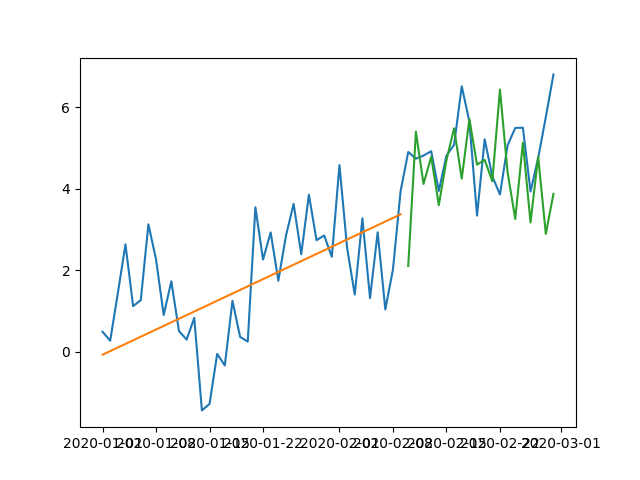

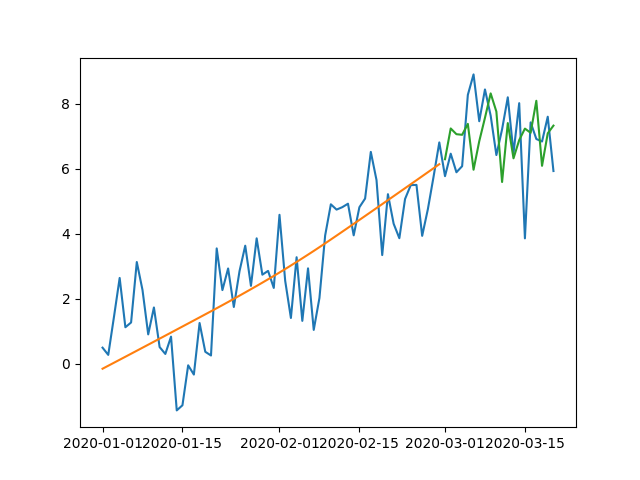

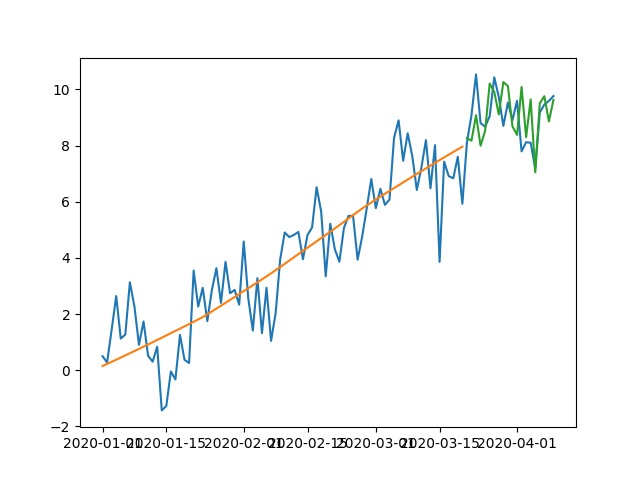

In [235]:
metrics, np.mean(metrics)

([1.0890381348387854, 1.099951925889414, 0.7490863323672444],
 0.9793587976984813)

In [215]:
metrics, np.mean(metrics)

([1.0890381348387854, 1.099951925889414, 0.7490863323672444],
 0.9793587976984813)

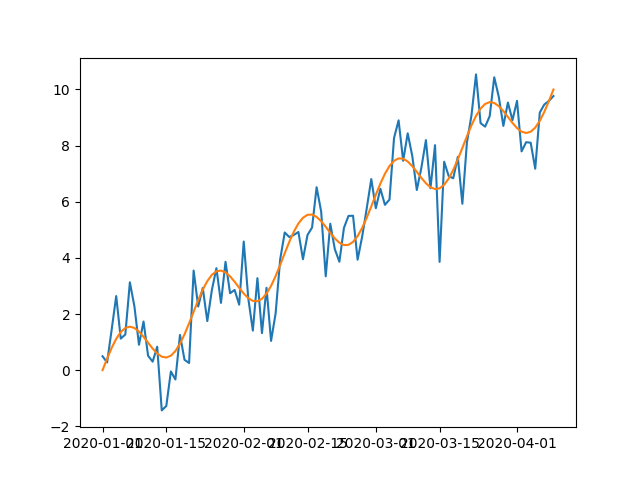

In [78]:

fig, ax = plt.subplots()
lines = ax.plot(series)
lines2 = ax.plot(series2)


plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

# Fit a linear model
X = np.array(range(len(series))).reshape(-1,1)
y = result.trend.dropna()
model = LinearRegression().fit(X, y)

# Predict the trend for the next 'n' periods
n = 10
X_forecast = np.array(range(len(series), len(series)+n)).reshape(-1,1)
forecasted_trend = model.predict(X_forecast)


In [3]:
seasonal_pattern = result.seasonal[-period:]
forecasted_seasonal = np.tile(seasonal_pattern, n//len(seasonal_pattern) + 1)[:n]


In [29]:
stl.config

{'period': 17,
 'seasonal': 13,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 29,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 19,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

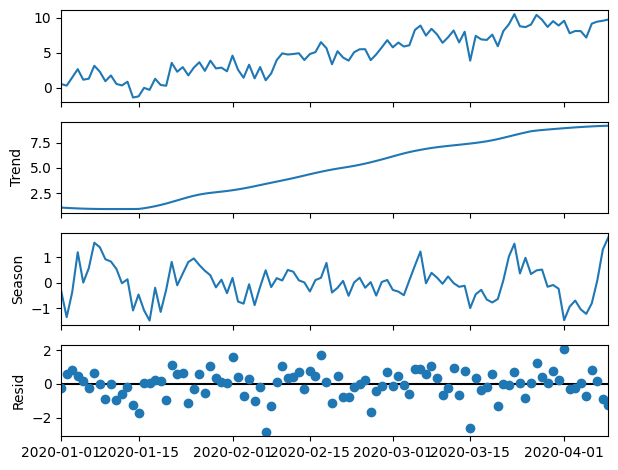

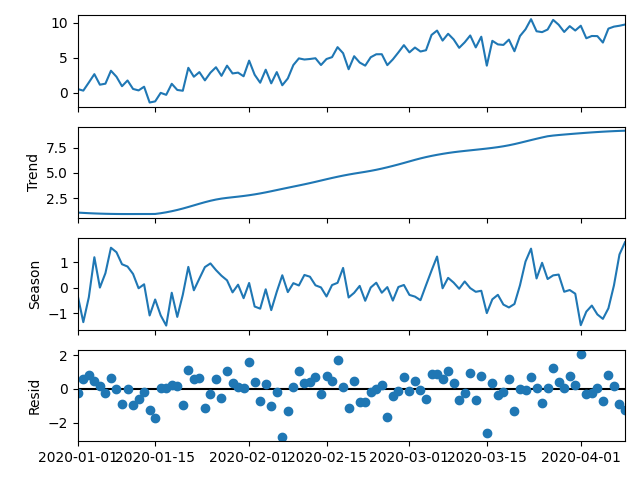

In [30]:
result.plot()

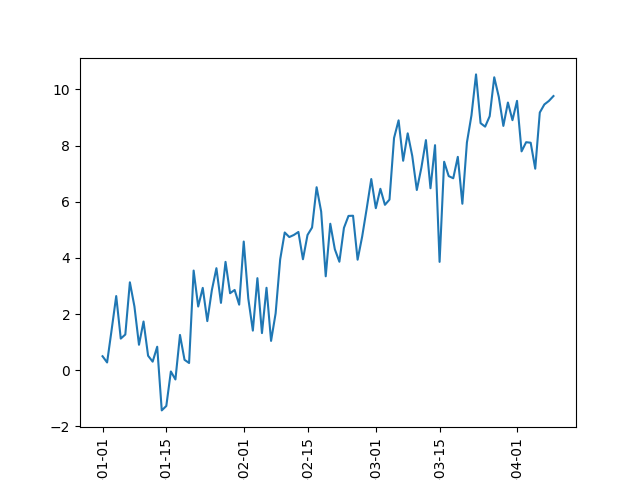

In [24]:
fig, ax = plt.subplots()
lines = ax.plot(series)
plt.xticks(rotation='vertical')
mplcursors.cursor(lines)
plt.show()


In [4]:
import mplcursors

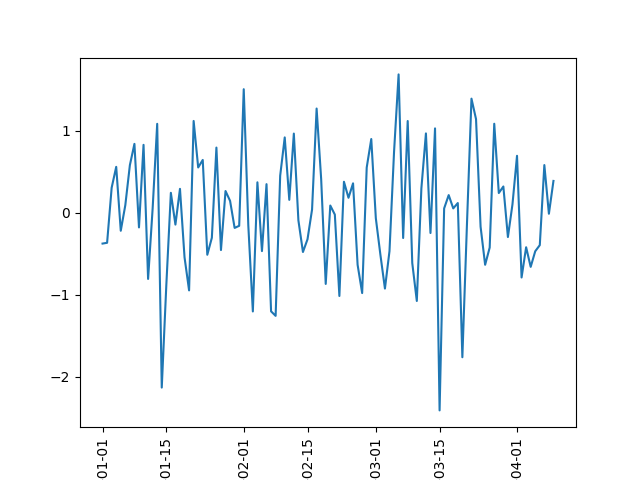

In [25]:
fig, ax = plt.subplots()
lines = ax.plot(result.resid)
plt.xticks(rotation='vertical')
mplcursors.cursor(lines)
plt.show()


In [22]:
%matplotlib widget

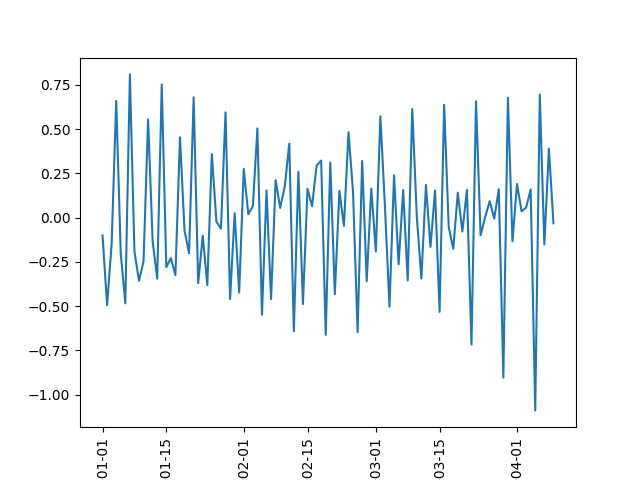

In [8]:
fig, ax = plt.subplots()
lines = ax.plot(result.seasonal)
plt.xticks(rotation='vertical')
mplcursors.cursor(lines)
plt.show()

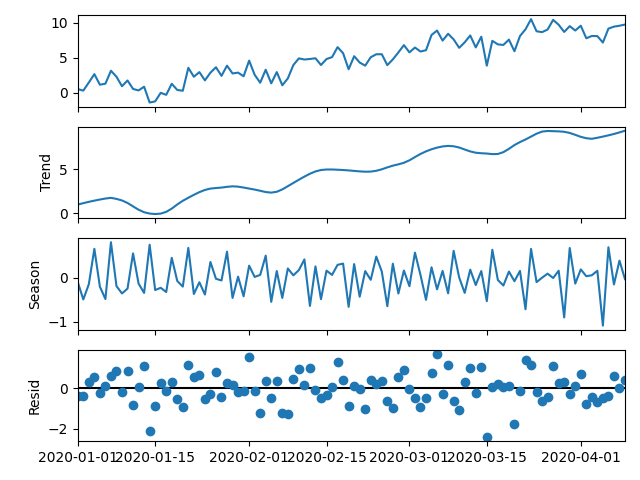

In [10]:
res = result.plot()
mplcursors.cursor(res)
plt.show()